In [1]:
import json
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np

In [2]:
# Data loading
def load_bdd_labels(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    return data

data = load_bdd_labels("/home/hariprasath/Documents/sie_as/full_dataset/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_train.json")


In [ ]:
# Class count
def get_class_counts(data):
    counts = Counter()
    for img in data:
        for label in img.get("labels", []):
            if "category" in label:
                counts[label["category"]] += 1
    return counts

class_counts = get_class_counts(data)


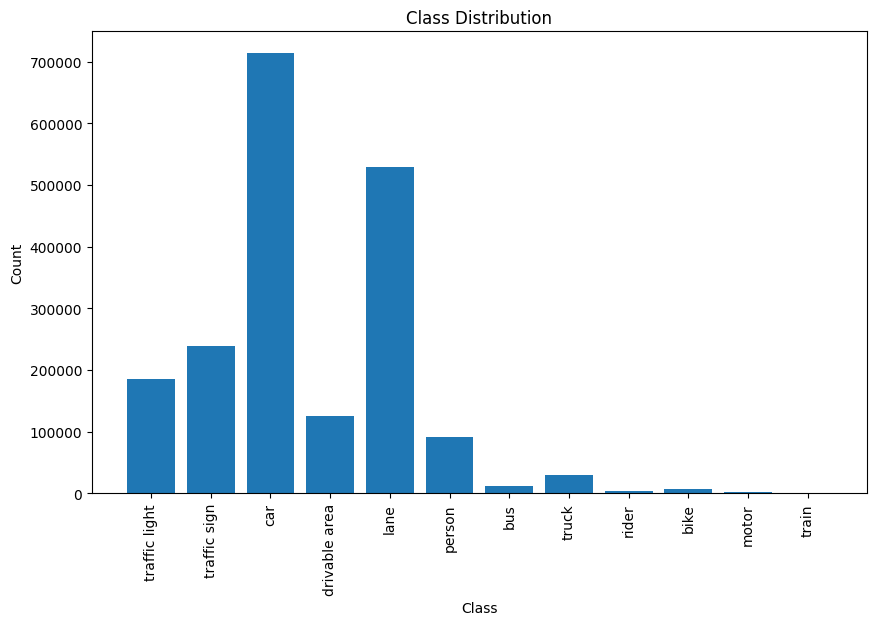

In [ ]:
# Plot the class count
def plot_class_counts(counts):
    plt.figure(figsize=(10, 6))
    classes = list(counts.keys())
    values = list(counts.values())
    plt.bar(classes, values)
    plt.xticks(rotation=90)
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    
plot_class_counts(class_counts)

In [5]:
# Scene attributes
def get_scene_attributes(data):
    attrs = Counter()
    for img in data:
        scene = img.get("attributes", {}).get("scene", "unknown")
        attrs[scene] += 1
    return attrs

scene_attrs = get_scene_attributes(data)

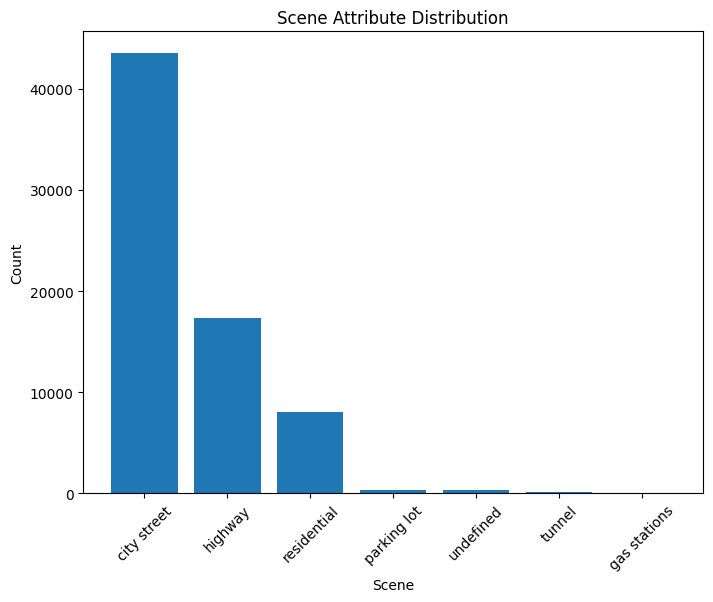

In [6]:
# Ploting Scene attributes
def plot_scene_attributes(attrs):
    plt.figure(figsize=(8, 6))
    scenes = list(attrs.keys())
    values = list(attrs.values())
    plt.bar(scenes, values)
    plt.xticks(rotation=45)
    plt.title("Scene Attribute Distribution")
    plt.xlabel("Scene")
    plt.ylabel("Count")

plot_scene_attributes(scene_attrs)


In [7]:
# BBox area_&_aspectratio
def get_bbox_stats(data):
    areas = []
    aspect_ratios = []
    for img in data:
        for label in img.get("labels", []):
            if "box2d" in label:
                x1 = label["box2d"]["x1"]
                y1 = label["box2d"]["y1"]
                x2 = label["box2d"]["x2"]
                y2 = label["box2d"]["y2"]
                w = x2 - x1
                h = y2 - y1
                areas.append(w * h)
                aspect_ratios.append(w / h if h != 0 else 0)
    return areas, aspect_ratios

areas, aspect_ratios = get_bbox_stats(data)

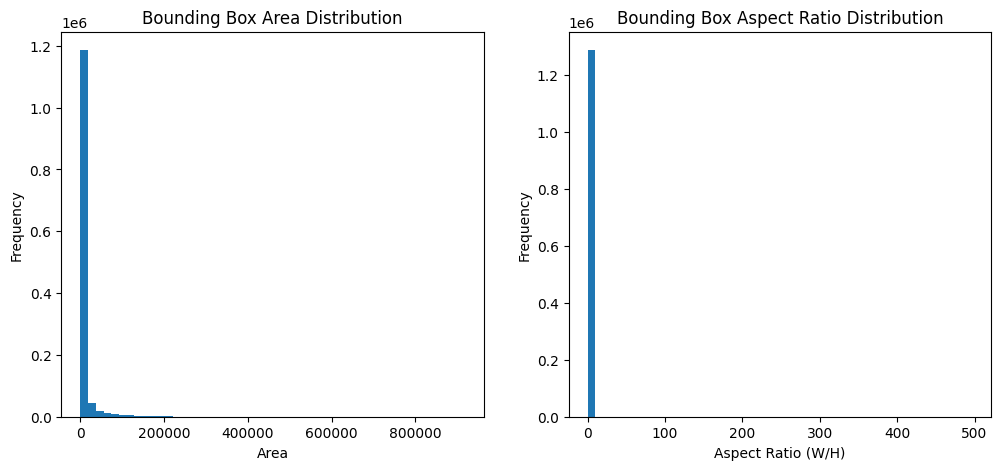

In [8]:
# Ploting BBox area_&_aspectratio
def plot_bbox_stats(areas, aspect_ratios):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(areas, bins=50)
    plt.title("Bounding Box Area Distribution")
    plt.xlabel("Area")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.hist(aspect_ratios, bins=50)
    plt.title("Bounding Box Aspect Ratio Distribution")
    plt.xlabel("Aspect Ratio (W/H)")
    plt.ylabel("Frequency")

plot_bbox_stats(areas, aspect_ratios)

In [9]:
# Occlusion_Truncation
def get_occlusion_truncation_stats(data):
    occ_stats = defaultdict(lambda: Counter())
    trunc_stats = defaultdict(lambda: Counter())
    for img in data:
        for label in img.get("labels", []):
            cat = label.get("category", "unknown")
            attrs = label.get("attributes", {})
            occ_stats[cat][attrs.get("occluded", False)] += 1
            trunc_stats[cat][attrs.get("truncated", False)] += 1
    return occ_stats, trunc_stats

occ_stats, trunc_stats = get_occlusion_truncation_stats(data)


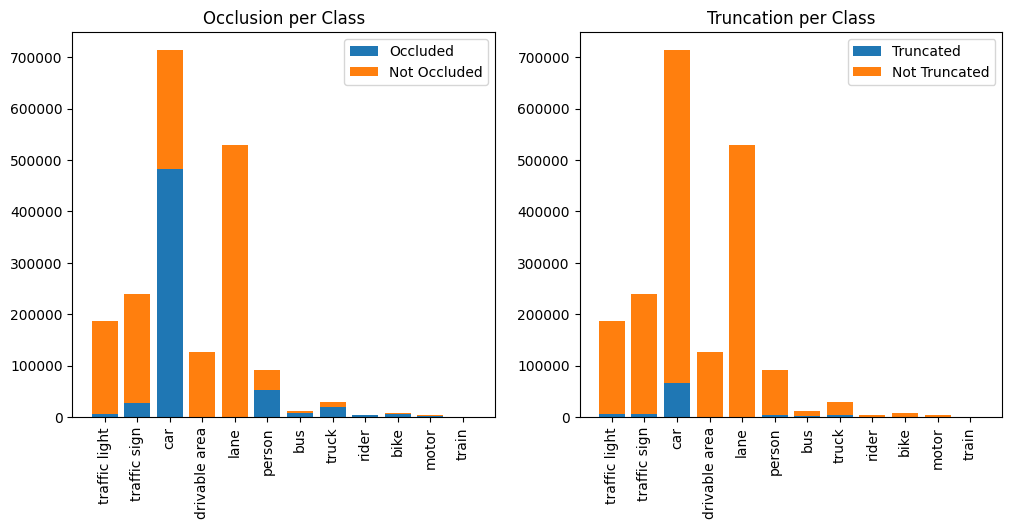

In [10]:
# Ploting Occlusion_Truncation
def plot_occ_trunc_stats(occ_stats, trunc_stats):
    categories = list(occ_stats.keys())
    occ_true = [occ_stats[c][True] for c in categories]
    occ_false = [occ_stats[c][False] for c in categories]

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(categories, occ_true, label="Occluded")
    plt.bar(categories, occ_false, bottom=occ_true, label="Not Occluded")
    plt.xticks(rotation=90)
    plt.title("Occlusion per Class")
    plt.legend()

    trunc_true = [trunc_stats[c][True] for c in categories]
    trunc_false = [trunc_stats[c][False] for c in categories]

    plt.subplot(1, 2, 2)
    plt.bar(categories, trunc_true, label="Truncated")
    plt.bar(categories, trunc_false, bottom=trunc_true, label="Not Truncated")
    plt.xticks(rotation=90)
    plt.title("Truncation per Class")
    plt.legend()

plot_occ_trunc_stats(occ_stats, trunc_stats)


In [11]:
# Segmentation
def get_segmentation_stats(data):
    seg_count = Counter()
    for img in data:
        for label in img.get("labels", []):
            if "poly2d" in label:
                seg_count[label["category"]] += 1
    return seg_count


seg_stats = get_segmentation_stats(data)

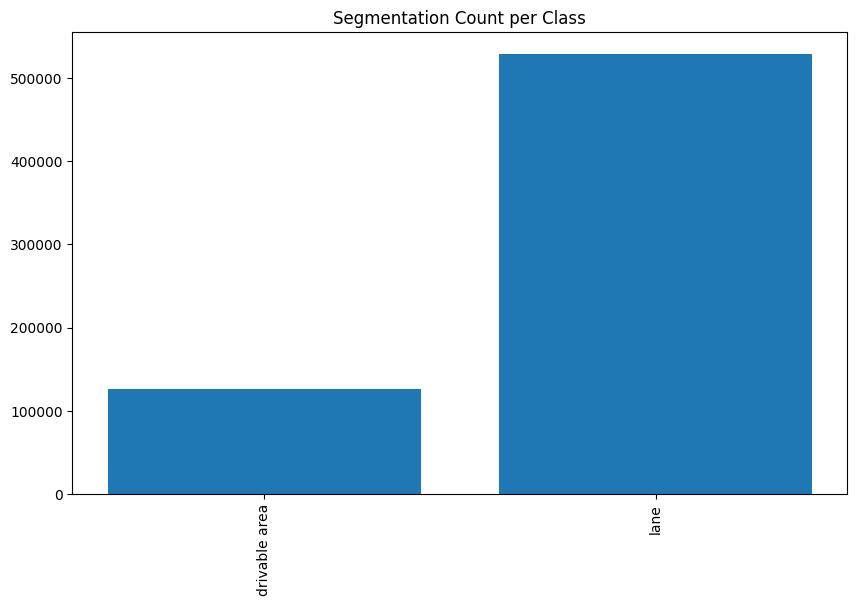

In [12]:
# Ploting Segmentation
def plot_segmentation_stats(seg_count):
    plt.figure(figsize=(10, 6))
    cats = list(seg_count.keys())
    vals = list(seg_count.values())
    plt.bar(cats, vals)
    plt.xticks(rotation=90)
    plt.title("Segmentation Count per Class")

plot_segmentation_stats(seg_stats)

In [13]:
# Weather
def get_weather_stats(data):
    weather_count = Counter()
    for img in data:
        w = img.get("attributes", {}).get("weather", "unknown")
        weather_count[w] += 1
    return weather_count


weather_count = get_weather_stats(data)

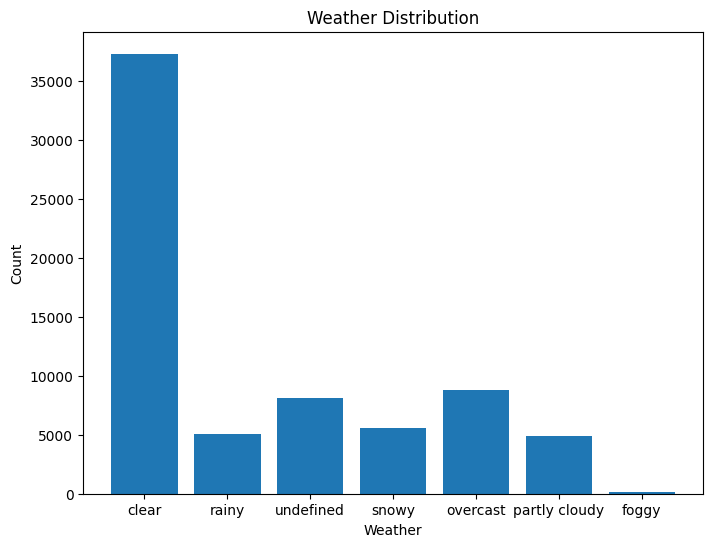

In [14]:
# Ploting Weather
def plot_weather_stats(weather_count):
    plt.figure(figsize=(8, 6))
    plt.bar(weather_count.keys(), weather_count.values())
    plt.title("Weather Distribution")
    plt.xlabel("Weather")
    plt.ylabel("Count")

plot_weather_stats(weather_count)

In [15]:
# Time of day
def get_time_of_day_stats(data):
    time_count = Counter()
    for img in data:
        t = img.get("attributes", {}).get("timeofday", "unknown")
        time_count[t] += 1
    return time_count


time_count = get_time_of_day_stats(data)

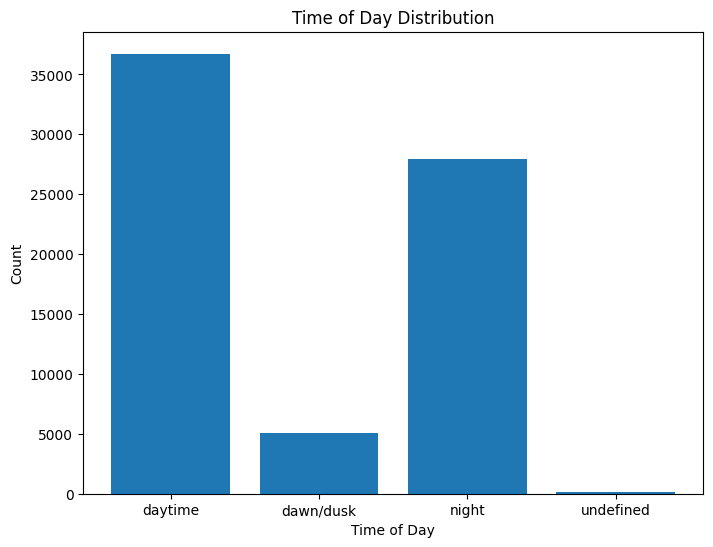

In [16]:
# Ploting time of day
def plot_time_of_day_stats(time_count):
    plt.figure(figsize=(8, 6))
    plt.bar(time_count.keys(), time_count.values())
    plt.title("Time of Day Distribution")
    plt.xlabel("Time of Day")
    plt.ylabel("Count")

plot_time_of_day_stats(time_count)

In [17]:
# Weather_vs_Time
def analyze_weather_vs_time(data):
    rel_counter = defaultdict(lambda: Counter())
    for img in data:
        attr = img.get("attributes", {})
        w = attr.get("weather", "unknown")
        t = attr.get("timeofday", "unknown")
        rel_counter[w][t] += 1
    return rel_counter


weather_time_rel = analyze_weather_vs_time(data)

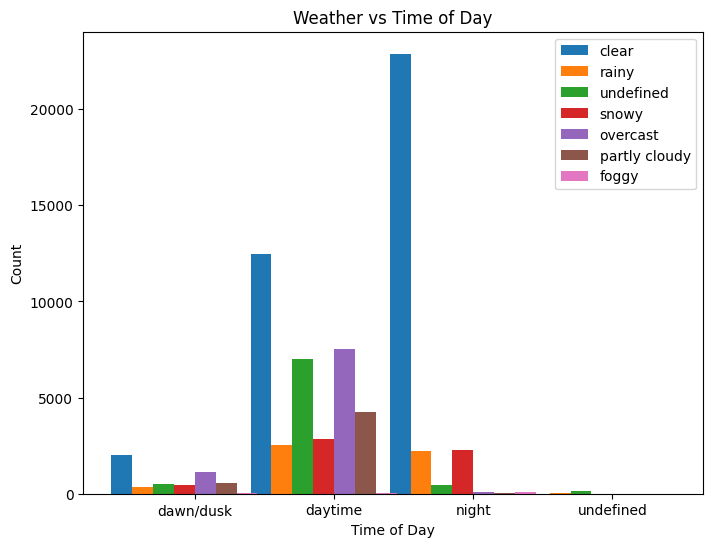

In [18]:
# Ploting Weather_vs_Time
def plot_weather_vs_time(rel_counter):
    weathers = list(rel_counter.keys())
    times = sorted({t for w in rel_counter for t in rel_counter[w]})
    
    plt.figure(figsize=(8, 6))
    bar_width = 0.15
    x = np.arange(len(times))
    
    for i, w in enumerate(weathers):
        counts = [rel_counter[w][t] for t in times]
        plt.bar(x + i * bar_width, counts, width=bar_width, label=w)
    
    plt.xticks(x + bar_width * (len(weathers) / 2), times)
    plt.title("Weather vs Time of Day")
    plt.xlabel("Time of Day")
    plt.ylabel("Count")
    plt.legend()

plot_weather_vs_time(weather_time_rel)